### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[260110筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/260110%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。
* 補充「篩選結果」之【當日狀態】，可參照以下表格：  
  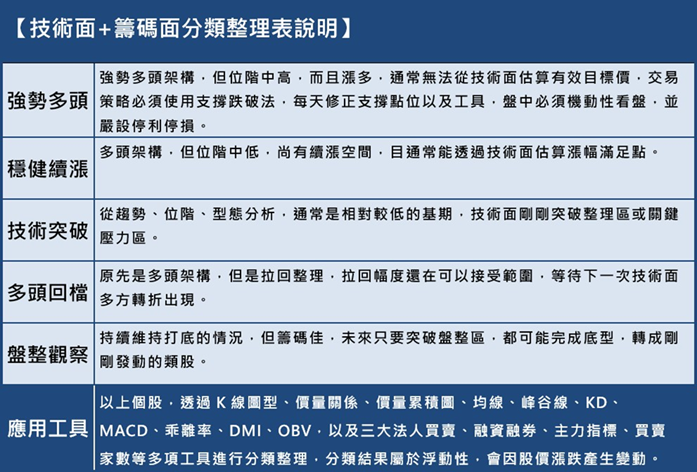
* [FinMind](https://finmindtrade.com/)資料錯誤的情況
  以台泥(1101)為例，[2025年8月13日停牌](https://www.msn.com/zh-tw/money/topstories/%E5%8F%B0%E6%B3%A5%E9%87%8D%E8%A8%8A%E5%BE%85%E7%99%BC%E5%B8%83-8-13%E8%B5%B7%E5%81%9C%E7%89%8C-%E5%A4%96%E7%95%8C%E7%8C%9C%E8%88%87-%E9%80%99%E4%BA%8B%E4%BB%B6-%E6%9C%89%E9%97%9C/ar-AA1KnA6E)：
  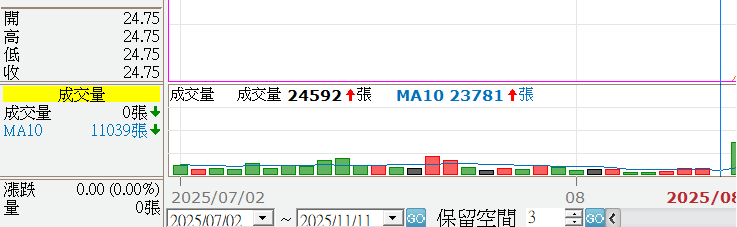  
  在FinMind內的價格資料會都是零：  
  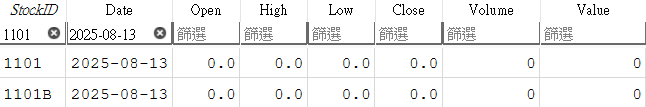  
  就會造成後續計算錯誤。有兩種方式對應：  
  1. [嘉實](https://www.sysjust.com.tw/)方式：停牌當天開盤價、收盤價、最高價與最低價都使用前一天的收盤價。  
  2. [三竹](https://www.mitake.com.tw/)方式：停牌當天跳過。  
  後續會先寫程式來刪除資料庫中停牌的資料，但更進一步的對應方式則待周末進行確認。  

* 引入模組與定義公用函式  

In [ ]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [ ]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [ ]:
mysys.UpdatestockDatabase()

* 【修改與驗證】從資料庫中刪除停牌的日Ｋ資料  

In [ ]:
import pandas as pd
import sqlite3

In [ ]:
# 開啟資料庫
conn = sqlite3.connect('data/stock.db')

In [ ]:
# 刪除前：尋找停牌的日Ｋ資料
df_daily_suspension = pd.read_sql("SELECT * FROM DailyPrice WHERE Open = 0.0 AND Close = 0.0 AND High = 0.0 AND LOW = 0.0 AND Volume = 0 AND Value = 0", conn)
display(df_daily_suspension)

In [ ]:
# 刪除停牌的日Ｋ資料
sql_cmd = "DELETE FROM DailyPrice WHERE Open = 0.0 AND Close = 0.0 AND High = 0.0 AND LOW = 0.0 AND Volume = 0 AND Value = 0"
conn.execute(sql_cmd)
# 修改資料庫
conn.commit()

In [ ]:
# 刪除後：尋找停牌的日Ｋ資料
df_daily_suspension = pd.read_sql("SELECT * FROM DailyPrice WHERE Open = 0.0 AND Close = 0.0 AND High = 0.0 AND LOW = 0.0 AND Volume = 0 AND Value = 0", conn)
display(df_daily_suspension)

In [ ]:
# 關閉資料庫
conn.close()

* 建立「解盤」物件    

In [ ]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

In [ ]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

In [ ]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股篩選  

* 選股程序    

In [ ]:
results = analysis.screener()

In [ ]:
for stock_info in results :
    print('股票代碼 ＝ {} ， 股票名稱 ＝ {} '.format(stock_info[0],stock_info[1]))

* 篩選結果  
  - 東捷(8064)：（回測頸線後）穩健續漲  
    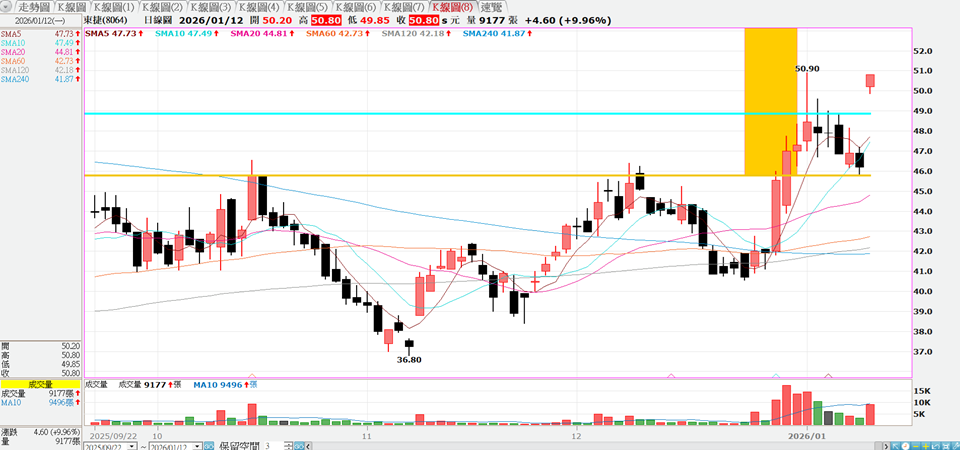  
  - 太欣(5302)：穩健續漲  
    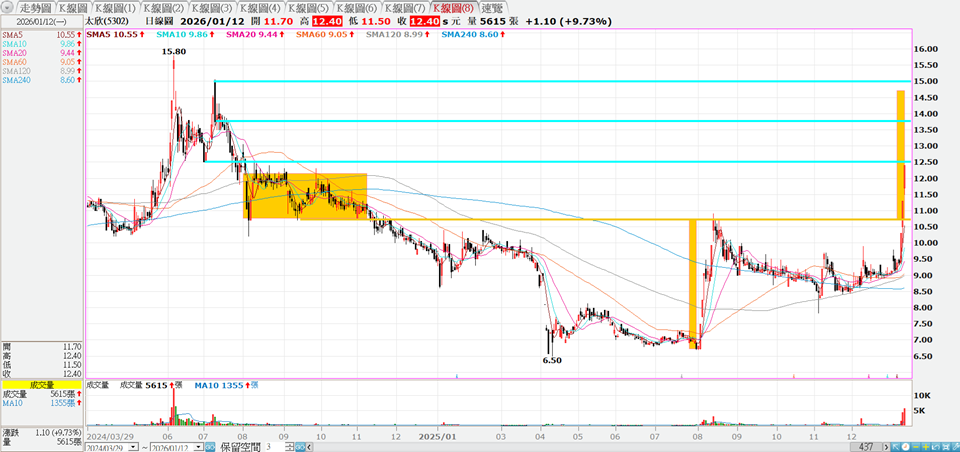  
  - 耀勝(3207)：盤整觀察  
    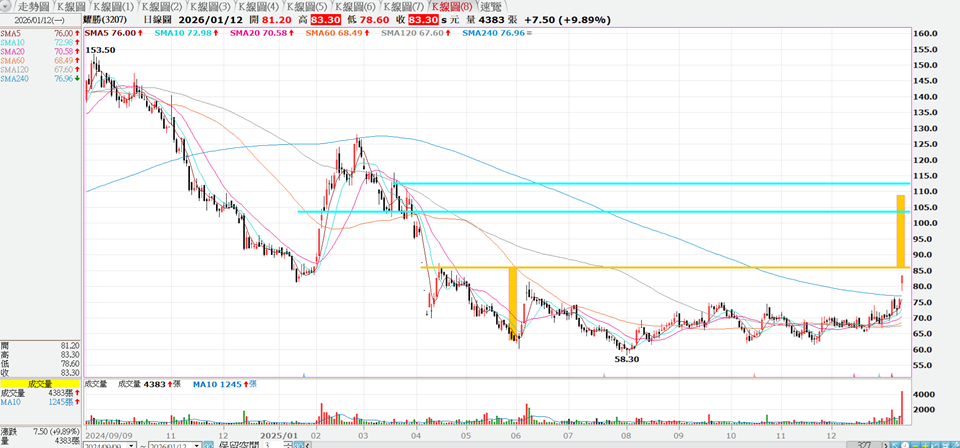  
  - 國喬(1312)：技術突破  
    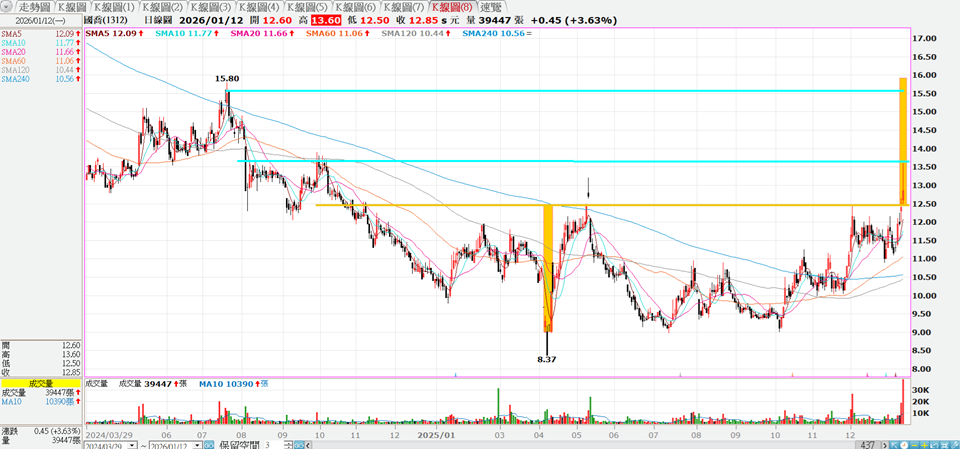  
  - 元晶(6443)：強勢多頭  
    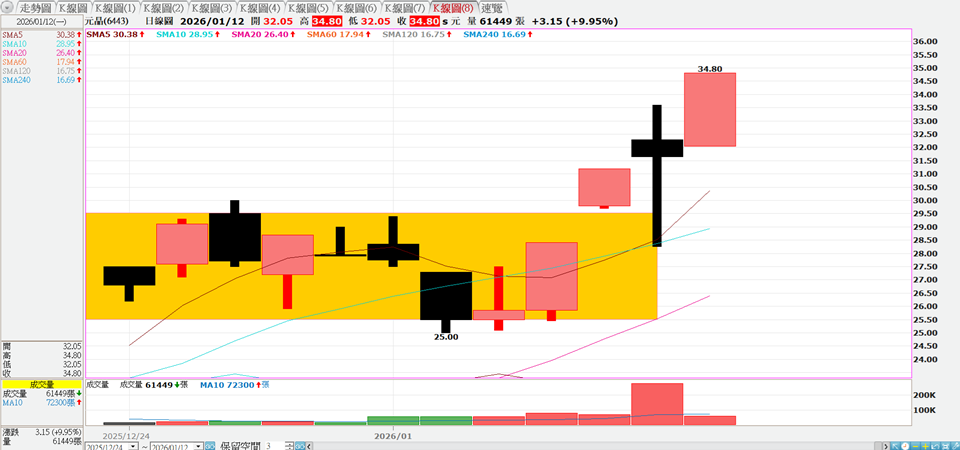
  - 全友(2305)：盤整觀察  
    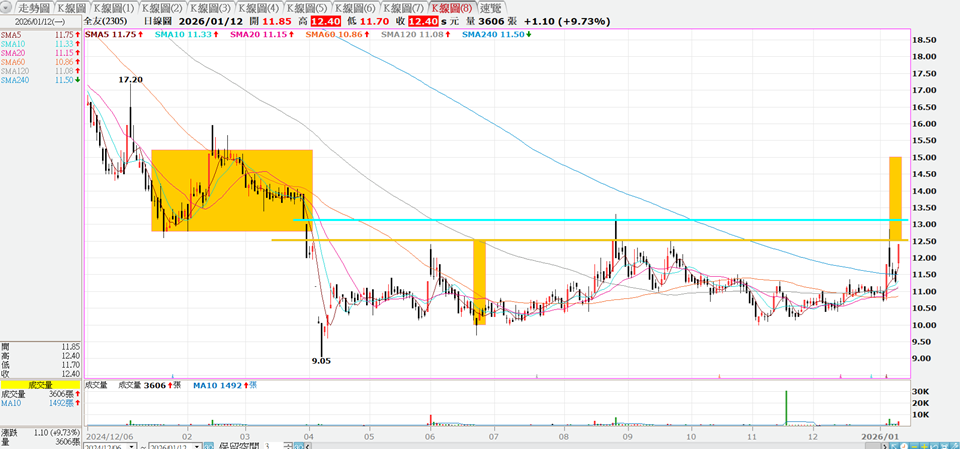
  - 台泥(1101)：盤整觀察（底型未有效突破）
    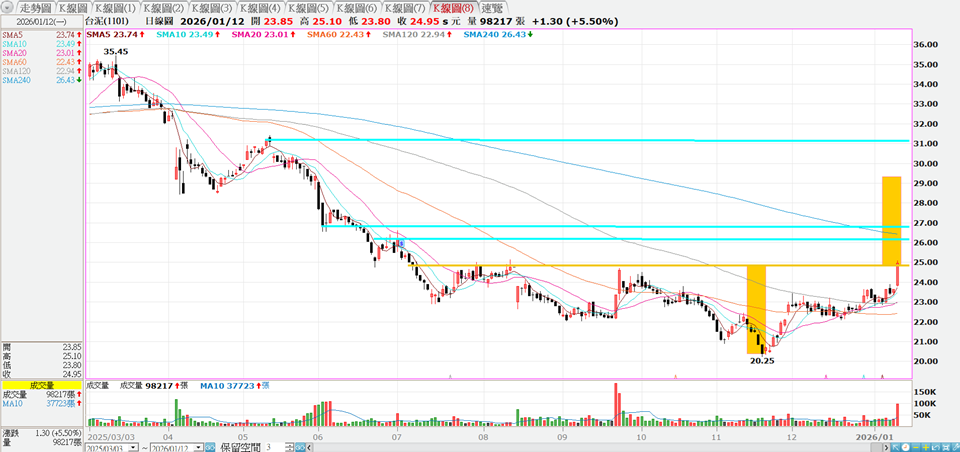
  - 美食-KY(2723)：技術突破  
    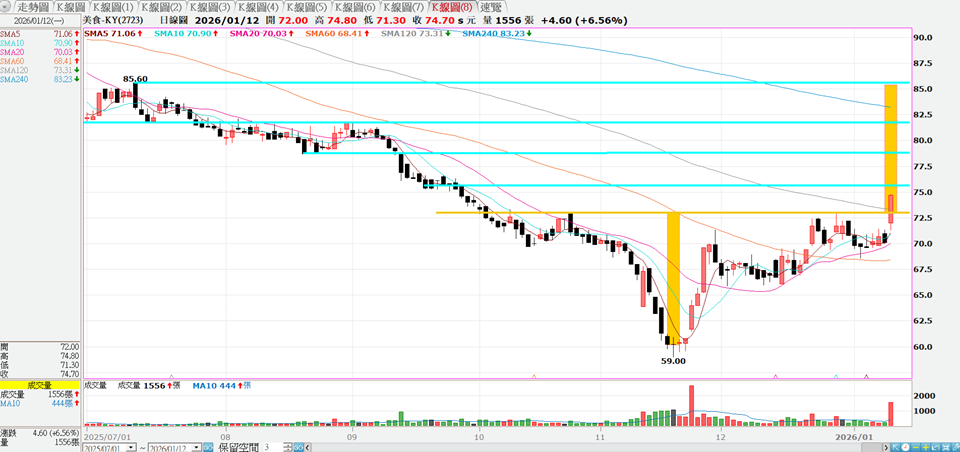  

* 觀察股列表  
  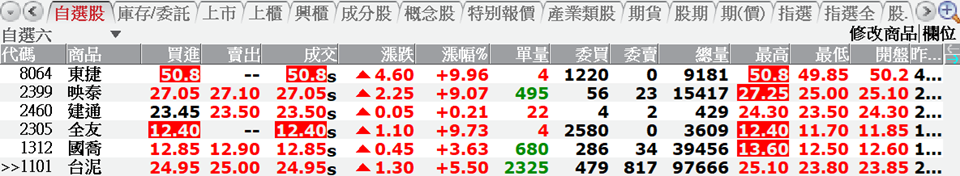  

### 個股解盤  

* 國喬(1312)  
  看法：底型突破，收盤留長上影線，留意籌碼。  

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'1312')

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-10-23'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-05-09']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-04-09'
    bottom_price = range_prices.loc['2025-04-09']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-12'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('1312','2024-05-14','2026-01-12',line_drawing_callback)
display(image)

籌碼面：  
法人大買(+5895)：外資大買(+5346)、投信中立(0)、自營大買(+549)。  
主力大買(+5895)。  
分公司買賣家數差集中(+30)。  
融資大增(+2175)、融券增(+144)。  

* 台泥(1101)    
  看法：底部雛形，尚未有效突破。  

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'1101',buttom_pattern = True)

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-07-04'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-07-30']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-19'
    bottom_price = range_prices.loc['2025-11-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('1101','2025-03-03','2026-01-12',line_drawing_callback)
display(image)

籌碼面：  
法人大買(+28534)：外資大買(+25106)、投信中立(-264)、自營大買(+3692)。  
主力大買(+29382)。  
分公司買賣家數差集中(+29)。  
融資減(-433)、融券增(+115)。  